# A Quick Tour of Julia

## What is Julia

-   **Open source** programming language
-   **Easy** to use:
    -   dynamic typing
    -   excellent REPL
-   Designed for **performance**:
    -   detailed type system, dynamic dispatch
    -   function code is optimized and compiled using LLVM
-   Excellent for **scientific programming**:
    -   good number crunching performance
    -   comprehensive libraries
    -   avoids the dual language problem

# Working with Julia

## Installation and setup

-   Get binaries at [julialang.org](https://julialang.org/downloads/) or
    use your OS’s package manager
-   Use current stable version: `v1.8.2`
-   Recommended IDE: vscode with [Julia
    plugins](https://www.julia-vscode.org/)
-   Install package [`IJulia`](https://github.com/JuliaLang/IJulia.jl)
    for [Jupyter](https://jupyter.org/) integration

## The REPL

-   **r**ead - **e**valuate - **p**rint loop
-   Julia’s command line interface
-   built-in:
    -   help function (type `?`)
    -   package manager (type `]`)
    -   shell integration (type `;`)
-   intelligent multi-line editing

## Installing packages

-   Access Julia’s built-in package manager from REPL: `]`

-   Add package [Images.jl](https://juliaimages.org/latest/):
    `] add Images`

-   Access an installed package:

    ``` julia
    using Images
    using FFTW: fft
    ```

-   See installed packages: `] st`

-   Outside REPL, package manager is available as module `Pkg`

In [1]:
using Pkg
Pkg.activate(".")
Pkg.add("Plots")

  Activating project at `~/Uni/CV`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Uni/CV/Project.toml`
  No Changes to `~/Uni/CV/Manifest.toml`
Precompiling project...
  ✓ Plots
  1 dependency successfully precompiled in 71 seconds. 133 already precompiled.


## Setting up a project (i.e., your homework)

-   Julia package structure: 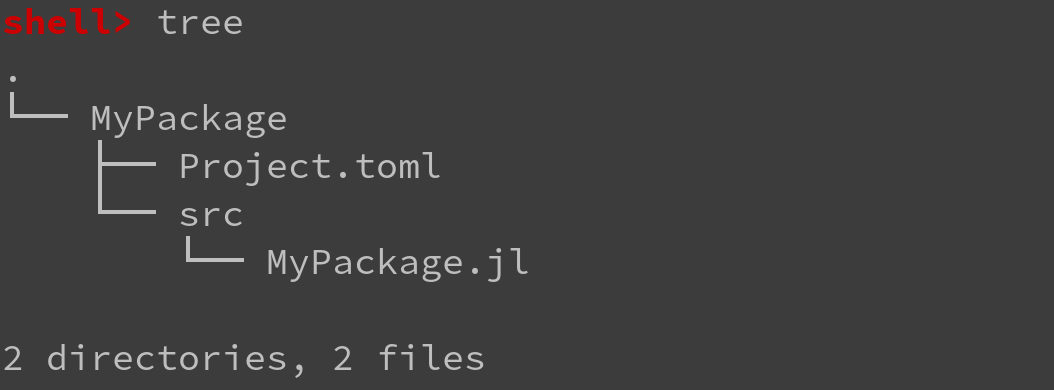
-   generate with `] generate MyPackage`
-   add files in `src` and `include` them in `MyPackage.jl`

## Using a project

-   tell Julia to use current folder as project folder: `] activate .`

In [1]:
using Pkg
Pkg.activate(".")

  Activating new project at `~/Uni/CV`


-   tell Julia to install all dependencies: `] instantiate`

In [2]:
Pkg.instantiate()

## Where to get help

-   Julia [documentation](https://docs.julialang.org/en/v1/) and
    [resources](https://julialang.org/learning/) at
    [julialang.org](julialang.org)
-   Julia [cheat sheet](https://juliadocs.github.io/Julia-Cheat-Sheet/)
-   StackOverflow tag
    [`julia`](https://stackoverflow.com/questions/tagged/julia)
-   Community [channels](https://julialang.org/community/) on several
    media

# Language Elements and Syntax

## The basics

-   comments begin with `#`
-   assignment with `=`, variables have dynamic types

In [3]:
a = 3       # Integer
a = 3.0     # Float64
a = 'c'     # Char
a = "Hi"    # String

"Hi"

## Operators

### Math:

In [10]:
println(3 + 5) # addition
println(3 - 5) # subtraction
println(3 * 5) # multiplication
println(3 / 5) # division
println(3 / 5) # division
println(3 ÷ 5) # integer division
println(3 ^ 5) # potentiation

8
-2
15
0.6
0.6
0
243


### Logic:

In [5]:
println(true && false)
println(true || false)

false
true


### Comparisons:

In [8]:
println(5 > 4)
println(6 ≤ 6)
println(5 ≠ 5)

true
true
false


## Control structures

-   Usual keywords for control structures: `if`, `for`, `while`
-   End of a construct is delimited by keyword `end`

In [ ]:
a = "Hi there"
if length(a) > 7
    println("Too long")
elseif length(a) < 7
    println("Too short")
else
    println("Just right")
end

In [ ]:
for i in 1:10
    println("i is $i")
end

## Vectors and Arrays

-   Array: **collection** of elements of the same type
-   For example:

In [ ]:
row = [1 2 3 4 5]       # row vector (size 1x5, type Int)
col = [1.; 2.; 3.; 4.]  # column vector (size 4, type Float64)
mat = [1. 2.; 3. 4.]    # matrix (size 2x2, type Float64)

-   Easy to build and manipulate:

In [11]:
z = zeros(3, 4)
o = ones(4, 2)
z * o   # matrix product

3×2 Matrix{Float64}:
 0.0  0.0
 0.0  0.0
 0.0  0.0

In [14]:
r = collect(1:10)

10-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

### Element access

-   Select elements with square brackets `[]`

In [17]:
x = randn(5, 4)
x[2, 2]

0.20688972995082555

-   Julia is **1-indexed** (unless you specify something else)
-   Select **slices** (sub-arrays) with `:`

In [20]:
x[2, :]

4-element Vector{Float64}:
 -2.922386150252561
  0.20688972995082555
 -0.6354045988015969
  0.329547930943046

-   Assignment to slices works as expected:

In [21]:
x[2, :] .= 0.
x

5×4 Matrix{Float64}:
  0.0214454   0.310527  -0.0618491   1.37331
  0.0         0.0        0.0         0.0
 -0.0433644  -0.290855  -0.587682    0.367464
  1.37631    -0.40065    0.409803   -0.0485554
 -0.360359   -1.30932   -1.13146    -1.25003

### Vectorized operations

-   Any function or operator can be **broadcast** (applied element-wise)
    using `.` operator

In [24]:
x = randn(2, 3)
println(x .* x)
println(sin.(x))

[0.01208707177777517 0.7033900247174021 0.10105306841649486; 0.025383780812327967 1.812565176942954 0.2632439934546478]
[0.10971987555863487 -0.7437637647179883 0.3125615054378495; 0.15864970103771592 0.9749097859838657 -0.4908569580468415]


-   Can also be written as a for loop (loops are fast in Julia)
-   To vectorize a whole line, use `@.` macro

In [45]:
x = randn(2, 3)
y = rand(2, 3)
z = zeros(2, 3)
@. z = x + y - π

2×3 Matrix{Float64}:
 -2.6515    -4.8044   -3.98301
  0.531919  -2.06588  -3.42781

## Visualization and Plotting

-   Plotting meta-package: `Plots.jl`
-   Several compatible backends:
    -   `GR` (standard)
    -   `PyPlot` (same as Python)
    -   `Plotly` (browser compatible)
    -   `UnicodePlots` (terminal compatible)
    -   `PGFPlotsX` (LaTeX-compatible output)
-   more on this in a separate tutorial

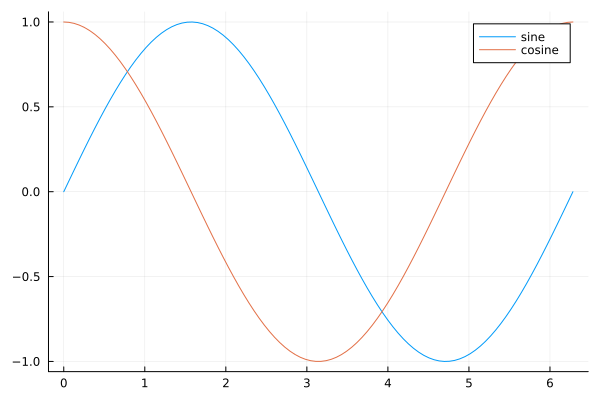

In [28]:
using Plots
x = LinRange(0, 2π, 100)
y = sin.(x)
plot(x, y, label="sine")
plot!(x, cos, label="cosine")

## Functions

-   Grouping code in functions is central to Julia
-   Functions are **compiled**, making them fast
-   Defined with `function` keyword:

In [29]:
using Statistics: mean

function rms(x)
    y = mean(x.^2)
    return √(y)
end

rms (generic function with 1 method)

In [30]:
rms(randn(5))

1.1271198417766337

-   Shorter syntax for one-line functions:

In [31]:
rms2(x) = √(mean(x.^2))

rms2 (generic function with 1 method)

-   Anonymous (lambda) functions:

In [35]:
x -> sqrt(mean(x.^2))

#6 (generic function with 1 method)

### Multiple dispatch

-   Functions are **generic**
-   Specific **method** is selected based on **types** of input
    arguments

In [36]:
cube(x) = x * x * x
println(cube(5))
println(cube(5.0))
println(cube("Hi"))

125
125.0
HiHiHi


-   This enables methods to be compiled to **efficient machine code**

In [37]:
@code_native cube(1)

	.text
	.file	"cube"
	.globl	julia_cube_5980                 # -- Begin function julia_cube_5980
	.p2align	4, 0x90
	.type	julia_cube_5980,@function
julia_cube_5980:                        # @julia_cube_5980
; ┌ @ In[36]:1 within `cube`
	.cfi_startproc
# %bb.0:                                # %top
; │┌ @ operators.jl:591 within `*` @ int.jl:88
	movq	%rdi, %rax
	imulq	%rdi, %rax
	imulq	%rdi, %rax
; │└
	retq
.Lfunc_end0:
	.size	julia_cube_5980, .Lfunc_end0-julia_cube_5980
	.cfi_endproc
; └
                                        # -- End function
	.section	".note.GNU-stack","",@progbits


-   Knowing your types is crucial

In [38]:
sqrt(-1.)

LoadError: DomainError with -1.0:
sqrt will only return a complex result if called with a complex argument. Try sqrt(Complex(x)).

In [39]:
sqrt(-1. + 0im)

0.0 + 1.0im

## Types

-   Julia’s type system:
    -   everything has a type
    -   a value has to be of a concrete type (a `struct`)
    -   concrete types can have abstract parent types
-   Inspect type of an object with `typeof`:

In [40]:
println(typeof(1.0))
println(typeof("Hi"))

Float64
String


-   Explore type hierarchy with `supertype`:

In [41]:
supertype(typeof(1.0))

AbstractFloat

### Make your own types

-   Abstract types:

In [42]:
abstract type AbstractPoint end;

-   Subtype relation expressed with `<:`
-   Type of something can be annotated with `::`
-   Concrete types with `struct` or `mutable struct`

In [48]:
struct Point2D <: AbstractPoint # Point is suptype of MyType
    x::Int # a Point has two fields, each of type Int
    y::Int
end

In [50]:
p = Point2D(3, 4)

Point2D(3, 4)

In [51]:
p.x = 4

LoadError: setfield!: immutable struct of type Point2D cannot be changed

## Useful packages

-   Base and standard library ([see
    docs.julialang.org](https://docs.julialang.org/en/v1/))
-   [`Plots.jl`](https://docs.juliaplots.org/latest/) for visualization
-   [`Images.jl`](https://juliaimages.org/latest/) for image processing
-   [`DifferentialEquations.jl`](https://docs.juliadiffeq.org/latest/)
    for differential equations
-   [`GPUArrays.jl`](https://juliagpu.github.io/GPUArrays.jl/latest/)
    and related packages for graphics acceleration